# Análisis de una solución de la ecuación de Laplace

La solución de la ecuación 
$$\frac{\partial^2 u}{\partial x^2} +\frac{\partial^2 u}{\partial y^2}= 0$$
sujeta a las condiciones de frontera:
$$u(0,y)=u(1,y)=0, \;\;\; 0<y<1$$

$$ u(x,0) = 100,\;\;\; u(x,1)=200 \;\;\; 0<x<1
 $$

Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\frac{200}{\pi}\sum_{n=1}^{\infty}( \frac{(1-(-1)^n)cosh(n \pi y)}{n} + \frac{(1-(-1)^n)(2-cosh(n \pi))senh(n \pi y)}{nsenh(n \pi)})sen(n \pi x) .$$

Este problema modela la transferencia de calor en una placa rectangular, con $k=1$.

In [ ]:
from pylab import *

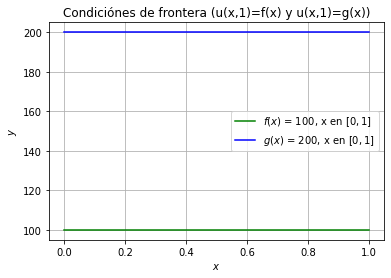

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,200)

x1 = np.linspace(0, 1,200)
x2 = np.linspace(0, 1,200)

plot(x1, [100 for x in x1], 'g',label='$f(x)$ = 100, x en $[0, 1]$')
plot(x2, [200 for x in x2], 'b',label='$g(x)$ = 200, x en $[0, 1]$')

plt.xlabel('$x$'); plt.ylabel('$y$'); 
plt.title("Condiciónes de frontera (u(x,1)=f(x) y u(x,1)=g(x))"),grid(),legend()
show()

Para empezar, graficamos la condición inicial.

Usamos una serie de Fourier para aproximar la condición de frontera $u(x,0)=f(0)=100$.

In [12]:
def u_0(x,N=10): 
    f = zeros(len(x))
    for n in range(1,N):
        f += ((1-(-1)**n)/n)*sin(n*pi*x)
    return (200.0/pi)*f

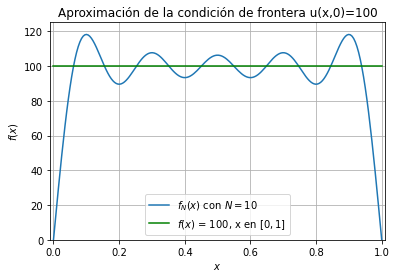

In [14]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=10$')
x1 = np.linspace(0, 1,200)

plot(x1, [100 for x in x1], 'g',label='$f(x)$ = 100, x en $[0, 1]$')
plt.ylabel('$f(x)$'); plt.xlabel('$x$'); 
plt.title("Aproximación de la condición de frontera u(x,0)=100")
xlim([-0.01,1.01]),ylim([0.0,125.2]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

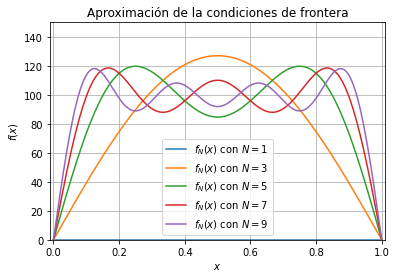

In [ ]:
for i in range(1,10,2):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condiciones de frontera")
xlim([-0.01,1.01]),ylim([0.0,150.4]),grid(),legend()
show()

Ahora, agregamos la parte de y para visualizar la solución completa. Primero, con, $y=0$.

In [ ]:
def u_x_y(x,y,N=10):
    f = zeros( (len(x),len(y)) )
    for i in range(len(y)):
        for n in range(1,N):
            f[:,i] += (((1-(-1)**n)*cosh(n*pi*y[i])/n)+((1-(-1)**n)*(2-cosh(n*pi))/(n*sinh(n*pi)))*sinh(n*pi*y[i]))*sin(n*pi*x)
    return (200.0/pi)*f

In [ ]:
x = linspace(0,1,100)
y = 0.1 *linspace(0,1,100)
U = u_x_y(x,y)

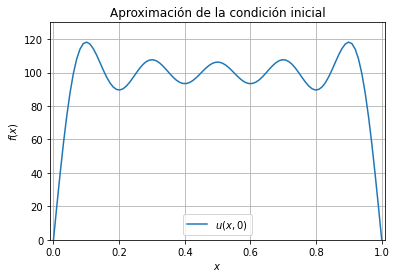

In [ ]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([0.0,130.05]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $y \to 1$.

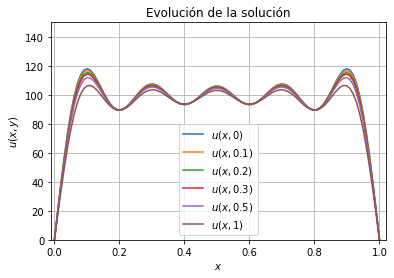

In [ ]:
plot(x,U[:,0],label='$u(x,0)$') 
plot(x,U[:,1],label='$u(x,0.1)$')
plot(x,U[:,2],label='$u(x,0.2)$')
plot(x,U[:,3],label='$u(x,0.3)$')
plot(x,U[:,5],label='$u(x,0.5)$')
plot(x,U[:,10],label='$u(x,1)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.02]),ylim([0.0,150.25]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

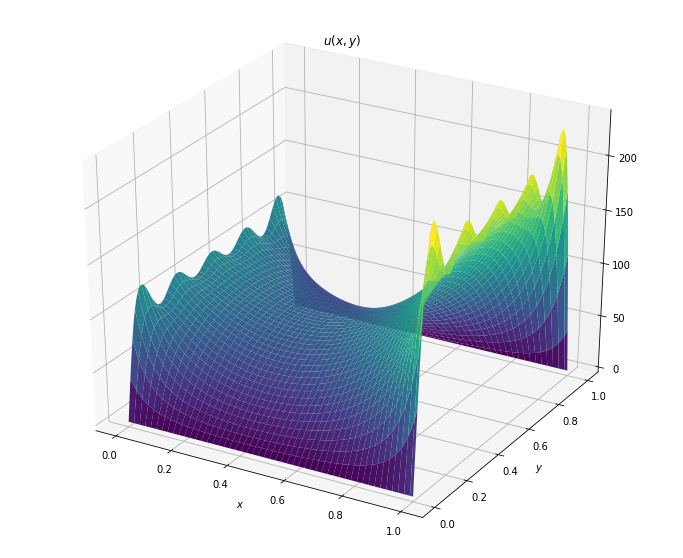

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0.0,1.0,100)
y = linspace(0.0,1.0,100)

X,Y = np.meshgrid(x,y)

U = u_x_y(x,y)

plt.xlabel('$x$'); plt.ylabel('$y$'); 
plt.title('$u(x,y)$')
ax.plot_surface(X, Y, U, cmap="viridis"); #Otros colores:"viridis", "inferno", "plasma"